# General aim of the notebook
The notebook aims at creating a confusion matrix to analyse the performance of a model.
# How to use this notebook
By default, the model used is the Random Forest Classifier. If needed, change the *Training* section with other models, e.g. the ones used in the processing Notebooks, such as *Models.ipynb*.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

# Load data

In [3]:
data_train_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Train_80.csv'
data_test_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Test_80.csv'

tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :48]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[48],squeeze=True)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :48]
yte = pd.read_csv(data_test_path,sep=",",usecols=[48],squeeze=True)

def add_column_names(data):
    
    liste=[]
    for i in range(48):
        liste.append(str(i+1))
    data.columns=liste
    return data,liste

X_train,liste = add_column_names(X_train)
X_test,liste = add_column_names(X_test)

ytr = ytr.astype(np.int64)
yte = yte.astype(np.int64)

## Preprocessing

In [4]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x)
    x = x - mean_x
    std_x = np.std(x)
    x = x / std_x
    return x
Xtrain=standardize(X_train)
X_test=standardize(X_test)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training

In [6]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth=9,random_state = 42)
classifier.fit(X_train, ytr)
Y_pred = classifier.predict(X_test)

## Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
lbs = [0,5,8,4,6,2,11,12,1,9,3,7,10,13] #alphabetical order
cf_matrix = confusion_matrix(yte, Y_pred,labels=lbs)
#print(cf_matrix)

[[ 15   0   0   0   0   0  40   0   1   0   0   0   0   4]
 [  2   8   0   2   4   0 117   0   3  11   1   0   0   0]
 [  0   0  21   2   1   0 174   0   8  16  15   0   0   3]
 [  0   1   0  38   0   0  95   0   5  15  21   2   0  15]
 [  2   0   0   3   7   0 126   0   6   4   5   0   1   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   8   6   5   8   0 614  13   8  32  43  11   0  26]
 [  0   0   0   1   0   0  41   5   0  42   7   1   2   5]
 [  1   4   4   2   3   0  64   1  40  13  13   3   2  18]
 [  5   1   1   9   4   0 205   5   6  47  23   3   1   5]
 [  3   1   0   0   2   0 184   0   7  10  83   0   1  13]
 [  0   0   0   0   0   0  44   0   1   7   6  14   0   0]
 [  4   2   0   5   1   0 119   0   6  14  29   0   1   7]
 [  3   0   0   1   0   0  86   0  15  15  12   0   0  76]]


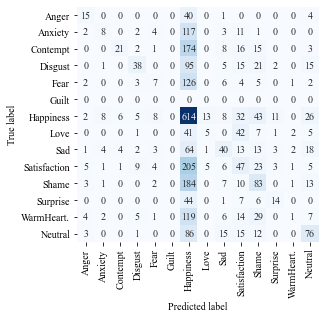

In [48]:
def cm_to_inch(value):
    return value/2.54
hfont = {'fontname':'Times New Roman'}
#sns.set_style({'font.family':'sans-serif', 'font.serif':'Times New Roman'})
sns.set_style({'fontname':'Times New Roman'})

categories = ['Anger','Anxiety','Contempt','Disgust','Fear','Guilt','Happiness',
                                         'Love','Sad','Satisfaction','Shame','Surprise','WarmHeart.','Neutral']
fig = plt.figure(figsize=(cm_to_inch(11),cm_to_inch(11)))
plt.rcParams["font.family"] = "Times New Roman"
sns.heatmap(cf_matrix,annot=True,cmap='Blues',cbar=False,xticklabels=categories,yticklabels=categories,fmt='g')
plt.ylabel('True label', **hfont)
plt.xlabel('Predicted label', **hfont)
fig.savefig('C:/Users/manon/Desktop/Projet_2 _ML/figures/conf_matrix.eps', format='eps',bbox_inches = 'tight')